# Exercise 14

## Predict rating using LSTM


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
dataTraining = pd.read_csv('https://github.com/albahnsen/AdvancedMethodsDataAnalysisClass/raw/master/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

In [3]:
dataTraining

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6
...,...,...,...,...,...
8417,2010,Our Family Wedding,""" our marriage , their wedding . "" it ' s l...","['Comedy', 'Romance']",4.9
1592,1984,Conan the Destroyer,"the wandering barbarian , conan , alongside ...","['Action', 'Adventure', 'Fantasy']",5.8
1723,1955,Kismet,"like a tale spun by scheherazade , kismet fol...","['Adventure', 'Musical', 'Fantasy', 'Comedy', ...",6.4
7605,1982,The Secret of NIMH,"mrs . brisby , a widowed mouse , lives in a...","['Animation', 'Adventure', 'Drama', 'Family', ...",7.6


In [4]:
plots = dataTraining['plot']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [5]:
plots

3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
                              ...                        
8417    " our marriage ,  their wedding .  "  it ' s l...
1592    the wandering barbarian ,  conan ,  alongside ...
1723    like a tale spun by scheherazade ,  kismet fol...
7605    mrs .  brisby ,  a widowed mouse ,  lives in a...
215     tinker bell journey far north of never land to...
Name: plot, Length: 7895, dtype: object

In [6]:
y

3107    1
900     0
6724    1
4704    1
2582    1
       ..
8417    0
1592    0
1723    0
7605    1
215     1
Name: rating, Length: 7895, dtype: int64

In [7]:
X = plots

# Exercise 14.1

- Remove stopwords 
- Lowercase
- split the text in words 
- pad_sequences

In [8]:
# use CountVectorizer to create document-term matrices from X
vect = CountVectorizer(lowercase=True, stop_words='english', )
X_dtm = vect.fit_transform(X)

In [9]:
temp=X_dtm.todense()
vect.vocabulary_

{'story': 32833,
 'single': 31227,
 'father': 12273,
 'takes': 33780,
 'year': 38079,
 'old': 24081,
 'son': 31862,
 'work': 37867,
 'railroad': 27483,
 'drawbridge': 10195,
 'bridge': 4169,
 'tender': 34120,
 'day': 8413,
 'boy': 3956,
 'meets': 21690,
 'woman': 37799,
 'boarding': 3611,
 'train': 34962,
 'drug': 10304,
 'abuser': 122,
 'goes': 14261,
 'engine': 11161,
 'room': 29290,
 'tells': 34080,
 'stay': 32577,
 'edge': 10659,
 'nearby': 23253,
 'lake': 19207,
 'ship': 30885,
 'comes': 6579,
 'lifted': 19863,
 'supposed': 33365,
 'arrive': 1666,
 'hour': 16282,
 'later': 19376,
 'happens': 15204,
 'sees': 30388,
 'tries': 35212,
 'warn': 37109,
 'able': 59,
 'just': 18388,
 'oncoming': 24139,
 'approaches': 1458,
 'falls': 12122,
 'gear': 13829,
 'works': 37883,
 'attempting': 1958,
 'lower': 20372,
 'leaving': 19546,
 'horrific': 16210,
 'choice': 5841,
 'lowers': 20375,
 'gears': 13831,
 'crushing': 7946,
 'people': 25307,
 'completely': 6737,
 'oblivious': 23904,
 'fact': 120

In [10]:
# rows are documents, columns are terms (aka "tokens" or "features")
X_dtm.shape

(7895, 38370)

In [11]:
# set of stop words
print(vect.get_stop_words())

frozenset({'find', 'anywhere', 'ltd', 'ten', 'were', 'least', 'whose', 'become', 'one', 'neither', 'have', 'yourselves', 'inc', 'without', 'done', 'describe', 'whereas', 'us', 'beyond', 'ourselves', 'front', 'noone', 'now', 'per', 'into', 'part', 'perhaps', 'hence', 'such', 'already', 'also', 'our', 'amongst', 'both', 'is', 'because', 'whole', 'mine', 'whereupon', 'no', 'enough', 'anything', 'down', 'during', 'well', 'eight', 'among', 'hereafter', 'himself', 'whoever', 'everywhere', 'six', 'whence', 'cannot', 'found', 'be', 'over', 'why', 'yourself', 'so', 'thru', 'between', 'towards', 'almost', 'how', 'to', 'whether', 'yet', 'herein', 'becomes', 'here', 'con', 'and', 'of', 'should', 'for', 'would', 'full', 'these', 'fifteen', 'every', 'me', 'about', 'amoungst', 'him', 'or', 'still', 'third', 'either', 'there', 'under', 'moreover', 'rather', 'very', 'in', 'else', 'until', 'twelve', 'forty', 'more', 'via', 'hereupon', 'might', 'serious', 'when', 'always', 'fifty', 'becoming', 'someone',

In [12]:
words = list(vect.vocabulary_.keys())
words

['story',
 'single',
 'father',
 'takes',
 'year',
 'old',
 'son',
 'work',
 'railroad',
 'drawbridge',
 'bridge',
 'tender',
 'day',
 'boy',
 'meets',
 'woman',
 'boarding',
 'train',
 'drug',
 'abuser',
 'goes',
 'engine',
 'room',
 'tells',
 'stay',
 'edge',
 'nearby',
 'lake',
 'ship',
 'comes',
 'lifted',
 'supposed',
 'arrive',
 'hour',
 'later',
 'happens',
 'sees',
 'tries',
 'warn',
 'able',
 'just',
 'oncoming',
 'approaches',
 'falls',
 'gear',
 'works',
 'attempting',
 'lower',
 'leaving',
 'horrific',
 'choice',
 'lowers',
 'gears',
 'crushing',
 'people',
 'completely',
 'oblivious',
 'fact',
 'died',
 'trying',
 'save',
 'addict',
 'happened',
 'look',
 'window',
 'movie',
 'ends',
 'man',
 'wandering',
 'new',
 'city',
 'longer',
 'holding',
 'small',
 'baby',
 'relevant',
 'narratives',
 'run',
 'parallel',
 'female',
 'meet',
 'climax',
 'tumultuous',
 'film',
 'serial',
 'killer',
 'decides',
 'teach',
 'secrets',
 'satisfying',
 'career',
 'video',
 'store',
 'clerk

In [13]:
# stem each word
stemmer = SnowballStemmer('english')
print([stemmer.stem(word) for word in words])

['stori', 'singl', 'father', 'take', 'year', 'old', 'son', 'work', 'railroad', 'drawbridg', 'bridg', 'tender', 'day', 'boy', 'meet', 'woman', 'board', 'train', 'drug', 'abus', 'goe', 'engin', 'room', 'tell', 'stay', 'edg', 'nearbi', 'lake', 'ship', 'come', 'lift', 'suppos', 'arriv', 'hour', 'later', 'happen', 'see', 'tri', 'warn', 'abl', 'just', 'oncom', 'approach', 'fall', 'gear', 'work', 'attempt', 'lower', 'leav', 'horrif', 'choic', 'lower', 'gear', 'crush', 'peopl', 'complet', 'oblivi', 'fact', 'die', 'tri', 'save', 'addict', 'happen', 'look', 'window', 'movi', 'end', 'man', 'wander', 'new', 'citi', 'longer', 'hold', 'small', 'babi', 'relev', 'narrat', 'run', 'parallel', 'femal', 'meet', 'climax', 'tumultu', 'film', 'serial', 'killer', 'decid', 'teach', 'secret', 'satisfi', 'career', 'video', 'store', 'clerk', 'sweden', 'blackmail', 'disfigur', 'facial', 'scar', 'gentleman', 'live', 'mean', 'accomplic', 'blackmail', 'love', 'bitter', 'resign', 'imposs', 'return', 'affect', 'life', 

In [14]:
X

3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
                              ...                        
8417    " our marriage ,  their wedding .  "  it ' s l...
1592    the wandering barbarian ,  conan ,  alongside ...
1723    like a tale spun by scheherazade ,  kismet fol...
7605    mrs .  brisby ,  a widowed mouse ,  lives in a...
215     tinker bell journey far north of never land to...
Name: plot, Length: 7895, dtype: object

In [15]:
# For vocabulary only the intersec characters is used to avoid issues with data collection
#voc = set(''.join(X))
vocabulary = {x: idx + 1 for idx, x in enumerate(set(words))}
print('Largo del vocabulario: ',len(vocabulary))
vocabulary

Largo del vocabulario:  38370


{'fantasialand': 1,
 'gibberish': 2,
 'river': 3,
 'uncommitted': 4,
 'songwriting': 5,
 'multiverse': 6,
 'ulee': 7,
 'rote': 8,
 'winship': 9,
 'jumanji': 10,
 'tiberius': 11,
 'tropical': 12,
 'dewey': 13,
 'flatwoods': 14,
 'stubbs': 15,
 'banking': 16,
 'tool': 17,
 'moralistic': 18,
 'kruggerand': 19,
 'spinkle': 20,
 'taunted': 21,
 'dodo': 22,
 'simular': 23,
 'jordon': 24,
 'fault': 25,
 'munro': 26,
 'tubs': 27,
 'horace': 28,
 'stronger': 29,
 'manhood': 30,
 'agree': 31,
 'heflin': 32,
 'rifles': 33,
 'stella': 34,
 'herbal': 35,
 'andorran': 36,
 'rejoices': 37,
 'carruthers': 38,
 'allegorical': 39,
 'feverishly': 40,
 'wiseguys': 41,
 'argued': 42,
 'breakdown': 43,
 'stampede': 44,
 'caddy': 45,
 'wolfhouse': 46,
 'bushwhackers': 47,
 'behalf': 48,
 'junkies': 49,
 'tano': 50,
 'hightails': 51,
 'ignites': 52,
 'givng': 53,
 'wisconsin': 54,
 'using': 55,
 'tips': 56,
 'resende': 57,
 'arnau': 58,
 'packaged': 59,
 'kwon': 60,
 'flennons': 61,
 'replica': 62,
 'recounti

In [16]:
dict(list(vocabulary.items())[38370:])

{}

In [17]:
maxlen =[]
for i in range(0,len(plots)):
  maxlen.append(len(plots.to_list()[i].split()))
pd.DataFrame(maxlen).describe(percentiles = [0.90,0.95,0.99])

,0
count,7895.000000
mean,144.770868
std,95.816408
min,1.000000
50%,127.000000
90%,274.600000
95%,328.000000
99%,438.060000
max,1863.000000


In [18]:
from keras.preprocessing import sequence
max_plot_len = 438
X_ = [x.split()[:max_plot_len] for x in X]
X_ = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in X_]
X_pad = sequence.pad_sequences(X_, maxlen=max_plot_len)

Using TensorFlow backend.


In [19]:
X_pad

array([[    0,     0,     0, ..., 24468, 29146, 21472],
       [    0,     0,     0, ...,  6411,  2968, 31655],
       [    0,     0,     0, ..., 30413, 18815,  8947],
       ...,
       [    0,     0,     0, ..., 17529, 26675, 11972],
       [    0,     0,     0, ..., 30719, 25710,  5477],
       [    0,     0,     0, ..., 28295, 16709, 24196]], dtype=int32)

# Exercise 14.2

Create a LSTM neural network to predict the rating of a movie

Calculate the testing set accuracy

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.33, random_state=42)

In [40]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import numpy as np
model = Sequential()
model.add(Embedding(np.array(X_pad).shape[1] + 1, 10, input_length=np.array(X_pad).shape[1]))
model.add(LSTM(48, recurrent_dropout=0.2))
#fuerza a la red a que generalice
#drop out en cada iteracion selecciona el 50% de todos los w y los remplaza por 0, forzandolo a aprender con los otros pesos
# esa funcion es importante para evitar el overfitting
model.add(Dropout(0.6))
#como es binaria se usa una sigmoide
model.add(Dense(4096,activation= 'relu'))
model.add(Dropout(0.6))
model.add(Dense(4096,activation= 'relu'))
model.add(Dropout(0.6))
model.add(Dense(2048,activation= 'selu'))
model.add(Dropout(0.6))
model.add(Dense(2048,activation= 'selu'))
model.add(Dropout(0.6))
model.add(Dense(1024,activation= 'tanh'))
model.add(Dropout(0.6))
model.add(Dense(512,activation= 'softmax'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()       

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 438, 10)           4390      
_________________________________________________________________
lstm_6 (LSTM)                (None, 48)                11328     
_________________________________________________________________
dropout_36 (Dropout)         (None, 48)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 4096)              200704    
_________________________________________________________________
dropout_37 (Dropout)         (None, 4096)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 4096)              16781312  
_________________________________________________________________
dropout_38 (Dropout)         (None, 4096)             

In [25]:
pip install livelossplot

In [26]:
from livelossplot import PlotLossesKeras
%matplotlib inline

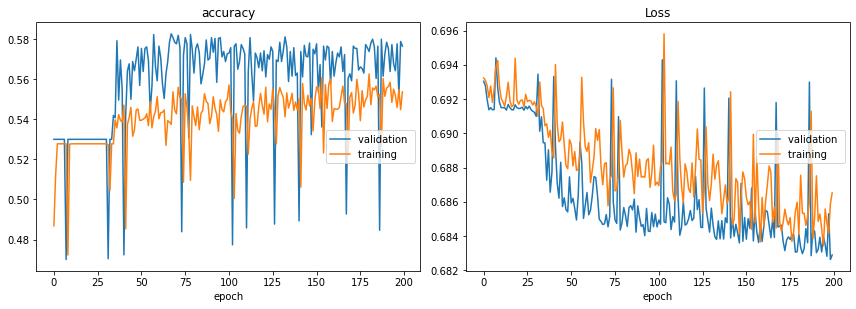

accuracy
	validation       	 (min:    0.470, max:    0.583, cur:    0.576)
	training         	 (min:    0.472, max:    0.562, cur:    0.554)
Loss
	validation       	 (min:    0.683, max:    0.694, cur:    0.683)
	training         	 (min:    0.683, max:    0.696, cur:    0.687)


In [41]:
model.fit(X_train, y_train, validation_data=[X_test, y_test], 
          #epochs=10, verbose=1,
          batch_size=5289, epochs=200, verbose=1,
          callbacks=[PlotLossesKeras()])

In [42]:
y_pred = model.predict_classes(X_test)[:,0]

print((y_pred == y_test).mean())

0.5763622409823485


No se logra un accuracy mayor a 58%, segun la grafica de entrenamiento el modelo no logro teber yb accuracy mayor a 58.3% en las 200 epocas de repaso.

